# 퀀트트레이딩CSV_Agent

## **** CSV 파싱 및 로딩 커스터마이징 ****
* docs[1].page_content 출력값을 그대로 체인에 넘기는 것보단 아래와 같이 수정해서 xml 형식으로 처리한 후 넘기는게 더 좋을거 같음 
* [csv module](https://docs.python.org/3/library/csv.html) 문서를 참조하여 지원되는 **csv args**에 대한 자세한 정보를 확인하세요.

In [12]:
# 컬럼정보:
# SPY FEZ EWJ EEM IEF TLT TIP GLD DBC DBA IYR

from langchain_community.document_loaders.csv_loader import CSVLoader

# CSV 파일 경로
loader1 = CSVLoader(
    file_path="./data/hrp_asset_rets.csv",
    csv_args={
        "delimiter": ",",  # 구분자
        "quotechar": '"',  # 인용 부호 문자
        "fieldnames": [
            "Date",
            "SPY",
            "FEZ",
            "EWJ",
            "EEM",
            "IEF",
            "TLT",
            "TIP",
            "GLD",
            "DBC",
            "DBA",
            "IYR",
        ],  # 필드 이름
    },
)

# 데이터 로드
docs_hrp_asset_rets = loader1.load()

loader2 = CSVLoader(
    file_path="./data/hrp_weights.csv",
    csv_args={
        "delimiter": ",",  # 구분자
        "quotechar": '"',  # 인용 부호 문자
        "fieldnames": [
            "Date",
            "SPY",
            "FEZ",
            "EWJ",
            "EEM",
            "IEF",
            "TLT",
            "TIP",
            "GLD",
            "DBC",
            "DBA",
            "IYR",
        ],  # 필드 이름
    },
)

# 데이터 로드
docs_hrp_weights = loader2.load()

loader3 = CSVLoader(
    file_path="./data/hrp_cum_rets.csv",
    csv_args={
        "delimiter": ",",  # 구분자
        "quotechar": '"',  # 인용 부호 문자
        "fieldnames": [
            "Date",
            "HRP_Return",
        ],  # 필드 이름
    },
)

# 데이터 로드
docs_hrp_cum_rets = loader3.load()

In [48]:
# 데이터 출력
print(docs_hrp_asset_rets)

[Document(metadata={'source': './data/hrp_asset_rets.csv', 'row': 0}, page_content='Date: Date\nSPY: SPY\nFEZ: FEZ\nEWJ: EWJ\nEEM: EEM\nIEF: IEF\nTLT: TLT\nTIP: TIP\nGLD: GLD\nDBC: DBC\nDBA: DBA\nIYR: IYR'), Document(metadata={'source': './data/hrp_asset_rets.csv', 'row': 1}, page_content='Date: 2008-05-18\nSPY: 0.0023081825285679444\nFEZ: 0.0019154256999502099\nEWJ: 0.0005459643898963435\nEEM: 0.002083735104861445\nIEF: -0.0017361562746551701\nTLT: -0.00042463261127851504\nTIP: -0.0002629152520005624\nGLD: 0.0015781289328801993\nDBC: -0.0001784656353251873\nDBA: -0.0006724203180784804\nIYR: 0.0002483693072277883'), Document(metadata={'source': './data/hrp_asset_rets.csv', 'row': 2}, page_content='Date: 2008-05-25\nSPY: -0.003018279606369554\nFEZ: -0.0012773704484436163\nEWJ: -0.00032135311679427035\nEEM: -0.001577792218293107\nIEF: 0.00020977585463470487\nTLT: -4.597602941174246e-05\nTIP: 0.001834033791533784\nGLD: 0.0019427287846558229\nDBC: 0.0025064119921513767\nDBA: -0.00117977965

In [14]:
print(docs_hrp_weights[10].page_content)

Date: 2008-07-13
SPY: 0.08423020409212066
FEZ: 0.06222737073562882
EWJ: 0.016881229867880664
EEM: 0.038979399674210234
IEF: 0.2581140859943918
TLT: 0.06892395938574931
TIP: 0.2469547676158051
GLD: 0.08238630244214659
DBC: 0.07913610836173794
DBA: 0.054326395135881875
IYR: 0.00784017669444704


In [15]:
print(docs_hrp_cum_rets[10].page_content)

Date: 2008-07-20
HRP_Return: -0.012711173818551247


In [16]:
print(docs_hrp_weights[-1].page_content)

Date: 2025-07-27
SPY: 0.05637362708062915
FEZ: 0.04852337359651739
EWJ: 0.018990816743881766
EEM: 0.06625634321966958
IEF: 0.1410892294440018
TLT: 0.04465888862274523
TIP: 0.3149476707727498
GLD: 0.08642452391019143
DBC: 0.0828323019032663
DBA: 0.10346585857957757
IYR: 0.03643736612676998


In [51]:
for doc in docs_hrp_asset_rets[1:]:
    row = doc.page_content.split("\n")
    asset_rets_str = "<row>"
    for element in row:
        splitted_element = element.split(":")
        value = splitted_element[-1]
        col = ":".join(splitted_element[:-1])
        asset_rets_str += f"<{col}>{value.strip()}</{col}>"
    asset_rets_str += "</row>"
    print(asset_rets_str)

<row><Date>2008-05-18</Date><SPY>0.0023081825285679444</SPY><FEZ>0.0019154256999502099</FEZ><EWJ>0.0005459643898963435</EWJ><EEM>0.002083735104861445</EEM><IEF>-0.0017361562746551701</IEF><TLT>-0.00042463261127851504</TLT><TIP>-0.0002629152520005624</TIP><GLD>0.0015781289328801993</GLD><DBC>-0.0001784656353251873</DBC><DBA>-0.0006724203180784804</DBA><IYR>0.0002483693072277883</IYR></row>
<row><Date>2008-05-25</Date><SPY>-0.003018279606369554</SPY><FEZ>-0.0012773704484436163</FEZ><EWJ>-0.00032135311679427035</EWJ><EEM>-0.001577792218293107</EEM><IEF>0.00020977585463470487</IEF><TLT>-4.597602941174246e-05</TLT><TIP>0.001834033791533784</TIP><GLD>0.0019427287846558229</GLD><DBC>0.0025064119921513767</DBC><DBA>-0.00117977965403688</DBA><IYR>-0.00029819689537088684</IYR></row>
<row><Date>2008-06-01</Date><SPY>0.0016553708713669645</SPY><FEZ>-8.996165749852905e-05</FEZ><EWJ>0.00024190375428044335</EWJ><EEM>0.0006581612673002371</EEM><IEF>-0.003686865462032065</IEF><TLT>-0.000985366631891534

In [52]:
for doc in docs_hrp_weights[1:]:
    row = doc.page_content.split("\n")
    asset_weights_str = "<row>"
    for element in row:
        splitted_element = element.split(":")
        value = splitted_element[-1]
        col = ":".join(splitted_element[:-1])
        asset_weights_str += f"<{col}>{value.strip()}</{col}>"
    asset_weights_str += "</row>"
    print(asset_weights_str)

<row><Date>2008-05-11</Date><SPY>0.08529443209448902</SPY><FEZ>0.05863069207555783</FEZ><EWJ>0.01463652536071943</EWJ><EEM>0.037830324342682554</EEM><IEF>0.26620639580812056</IEF><TLT>0.059445504062777293</TLT><TIP>0.25686950595275176</TIP><GLD>0.08217114412323584</GLD><DBC>0.0803458562793021</DBC><DBA>0.05229865182035341</DBA><IYR>0.006270968080010177</IYR></row>
<row><Date>2008-05-18</Date><SPY>0.08575665409872446</SPY><FEZ>0.05929890984497994</FEZ><EWJ>0.014580428893289555</EWJ><EEM>0.038166413284959205</EEM><IEF>0.2663251105889902</IEF><TLT>0.059689543188472326</TLT><TIP>0.25668885050850887</TIP><GLD>0.08129714513648847</GLD><DBC>0.07884978252610751</DBC><DBA>0.05304015523625823</DBA><IYR>0.006307006693221258</IYR></row>
<row><Date>2008-05-25</Date><SPY>0.08419377534864031</SPY><FEZ>0.05853490636934595</FEZ><EWJ>0.014674340979128304</EWJ><EEM>0.03755945311839289</EEM><IEF>0.26970026283436</IEF><TLT>0.06068727443141239</TLT><TIP>0.2573137648744904</TIP><GLD>0.08185636398028705</GLD>

In [53]:
for doc in docs_hrp_cum_rets[1:]:
    row = doc.page_content.split("\n")
    cum_rets_str = "<row>"
    for element in row:
        splitted_element = element.split(":")
        value = splitted_element[-1]
        col = ":".join(splitted_element[:-1])
        cum_rets_str += f"<{col}>{value.strip()}</{col}>"
    cum_rets_str += "</row>"
    print(cum_rets_str)

<row><Date>2008-05-18</Date><HRP_Return>0.005405215872046121</HRP_Return></row>
<row><Date>2008-05-25</Date><HRP_Return>0.004172792625951605</HRP_Return></row>
<row><Date>2008-06-01</Date><HRP_Return>-0.008752039980660542</HRP_Return></row>
<row><Date>2008-06-08</Date><HRP_Return>-0.002187078837994738</HRP_Return></row>
<row><Date>2008-06-15</Date><HRP_Return>-0.013069940914930855</HRP_Return></row>
<row><Date>2008-06-22</Date><HRP_Return>-0.011097719231280112</HRP_Return></row>
<row><Date>2008-06-29</Date><HRP_Return>0.002888852656415253</HRP_Return></row>
<row><Date>2008-07-06</Date><HRP_Return>0.004849986172372089</HRP_Return></row>
<row><Date>2008-07-13</Date><HRP_Return>0.0009082398491007115</HRP_Return></row>
<row><Date>2008-07-20</Date><HRP_Return>-0.012711173818551247</HRP_Return></row>
<row><Date>2008-07-27</Date><HRP_Return>-0.023890546850659056</HRP_Return></row>
<row><Date>2008-08-03</Date><HRP_Return>-0.019426839742960555</HRP_Return></row>
<row><Date>2008-08-10</Date><HRP

### **** RAG ****

In [17]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()

True

In [18]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("퀀트결과파일-RAG")

LangSmith 추적을 시작합니다.
[프로젝트명]
퀀트결과파일-RAG


In [23]:
import bs4
from langchain import hub
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma, FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_core.prompts import PromptTemplate

In [57]:
# 단계 2: 문서 분할(Split Documents) 패스
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
# splits = text_splitter.split_documents(docs)

# 단계 3: 임베딩 & 벡터스토어 생성(Create Vectorstore) 패스
# 벡터스토어를 생성합니다.
# vectorstore = FAISS.from_documents(documents=splits, embedding=OpenAIEmbeddings())

# 단계 4: 검색(Search) 패스
# 뉴스에 포함되어 있는 정보를 검색하고 생성합니다.
# retriever = vectorstore.as_retriever()

# 단계 5: 프롬프트 생성(Create Prompt)
# 프롬프트를 생성합니다.
prompt = PromptTemplate.from_template(
    """
당신은 포트폴리오 분석 전문가입니다.

아래는 **실제 사용자 포트폴리오의 수치 데이터**입니다. 반드시 수치 기반 분석만 수행하세요.

---

### [1] 자산별 포트폴리오 가중치 
{asset_weights_text}

---

### [2] 자산별 수익률 
{asset_rets_text}

---

### [3] 포트폴리오 누적 수익률
{cum_rets_text}

---

사용자의 질문은 다음과 같습니다:

{question}

---

위 데이터를 바탕으로 다음 항목을 중심으로 정량적 분석을 수행하세요:

1. **가장 최근 시점의 자산별 가중치**를 기반으로 각 자산의 현재 비중을 요약하세요.
2. **자산별 수익률의 흐름**을 요약하고, 어떤 자산이 최근 수익률이 높았는지/낮았는지를 기술하세요.
3. **자산별 변동성(표준편차)**을 계산하고, 변동성이 큰 자산과 작은 자산을 구분하여 설명하세요.
4. **전체 포트폴리오의 누적 수익률 변화**를 요약하세요. 상승/하락 추세가 보이는지도 간단히 분석하세요.

주의: 예시 데이터를 만들어 설명하지 말고, 반드시 위의 **실제 수치 데이터**를 기준으로 분석하세요.

    """
)

# 단계 6: 언어모델 생성(Create LLM)
# 모델(LLM) 을 생성합니다.
llm = ChatOpenAI(model_name="gpt-4o", temperature=0)

# def format_docs(docs):
#     # 검색한 문서 결과를 하나의 문단으로 합쳐줍니다.
#     return "\n\n".join(doc.page_content for doc in docs)

# 단계 7: 체인 생성(Create Chain)

rag_chain = (
    {
        "asset_weights_text": RunnableLambda(lambda _: asset_weights_str),
        "asset_rets_text": RunnableLambda(lambda _: asset_rets_str),
        "cum_rets_text": RunnableLambda(lambda _: cum_rets_str),
        "question": RunnablePassthrough(),
    }
    | prompt
    | llm
    | StrOutputParser()
)

# 단계 8: 체인 실행(Run Chain)
# 문서에 대한 질의를 입력하고, 답변을 출력합니다.
question = "리스크패리티 퀀트 결과를 담은 3개의 문서를 분석하여 정량적 분석 보고서를 작성해주세요"
response = rag_chain.invoke(question)

In [32]:
# print("=== 가중치 ===")
# print(weights_text)
# print("=== 수익률 ===")
# print(rets_text)
# print("=== 누적 수익률 ===")
# print(cum_rets_text)

In [58]:
# 결과 출력
print(f"[HUMAN]\n{question}\n")
print(f"[AI]\n{response}")

[HUMAN]
리스크패리티 퀀트 결과를 담은 3개의 문서를 분석하여 정량적 분석 보고서를 작성해주세요

[AI]
### 정량적 분석 보고서

#### 1. 자산별 가중치 요약
가장 최근 시점(2025-07-27)의 자산별 포트폴리오 가중치는 다음과 같습니다:

- SPY: 5.64%
- FEZ: 4.85%
- EWJ: 1.90%
- EEM: 6.63%
- IEF: 14.11%
- TLT: 4.47%
- TIP: 31.49%
- GLD: 8.64%
- DBC: 8.28%
- DBA: 10.35%
- IYR: 3.64%

이 데이터는 TIP(31.49%)와 IEF(14.11%)가 포트폴리오에서 가장 큰 비중을 차지하고 있음을 보여줍니다. 이는 사용자가 인플레이션 보호 채권(TIP)과 중기 국채(IEF)에 대한 높은 신뢰를 가지고 있음을 시사합니다.

#### 2. 자산별 수익률 흐름 요약
2025-07-27 기준 자산별 수익률은 다음과 같습니다:

- SPY: 0.084%
- FEZ: 0.085%
- EWJ: 0.108%
- EEM: 0.057%
- IEF: 0.051%
- TLT: 0.063%
- TIP: 0.038%
- GLD: -0.028%
- DBC: -0.129%
- DBA: 0.019%
- IYR: 0.072%

EWJ(일본 주식 ETF)가 0.108%로 가장 높은 수익률을 기록했으며, DBC(상품 지수 ETF)는 -0.129%로 가장 낮은 수익률을 보였습니다. 이는 최근 일본 시장의 긍정적인 흐름과 상품 시장의 부진을 반영합니다.

#### 3. 자산별 변동성(표준편차) 분석
주어진 데이터로는 자산별 변동성을 직접 계산할 수 없습니다. 변동성 분석을 위해서는 일정 기간 동안의 수익률 데이터가 필요합니다. 그러나, 일반적으로 상품 관련 자산(예: DBC, DBA)은 주식이나 채권보다 변동성이 큰 경향이 있습니다. 따라서, DBC의 부정적인 수익률은 높은 변동성의 결과일 가능성이 큽니다.

#### 4. 전체 포트폴리오의 누적 수익률 변화 요약
2025-

### **** LangChain의 create_pandas_dataframe_agent() 활용해보기 ****

In [1]:
import pandas as pd

asset_rets = pd.read_csv("./data/hrp_asset_rets.csv")
cum_rets = pd.read_csv("./data/hrp_cum_rets.csv")
asset_weights = pd.read_csv("./data/hrp_weights.csv")

In [ ]:
from langchain_experimental.tools import PythonAstREPLTool

# 파이썬 코드를 실행하는 도구를 생성합니다.
python_tool = PythonAstREPLTool()


# 도구 호출 시 실행되는 콜백 함수입니다.

def tool_callback(tool) -> None:

    print(f"<<<<<<< Code >>>>>>")

    if tool_name := tool.get("tool"):  # 도구에 입력된 값이 있다면

        if tool_name == "python_repl_ast":

            tool_input = tool.get("tool_input")

            for k, v in tool_input.items():

                if k == "query":

                    print(v)  # Query 를 출력합니다.

                    result = python_tool.invoke({"query": v})

                    print(result)

    print(f"<<<<<<< Code >>>>>>")



# 관찰 결과를 출력하는 콜백 함수입니다.

def observation_callback(observation) -> None:

    print(f"<<<<<<< Message >>>>>>")

    if "observation" in observation:

        print(observation["observation"])

    print(f"<<<<<<< Message >>>>>>")



# 최종 결과를 출력하는 콜백 함수입니다.

def result_callback(result: str) -> None:

    print(f"<<<<<<< 최종 답변 >>>>>>")

    print(result)

    print(f"<<<<<<< 최종 답변 >>>>>>")

In [3]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.agents.agent_types import AgentType
from langchain_openai import ChatOpenAI
from langchain_teddynote.messages import AgentStreamParser, AgentCallbacks

agent_asset_rets = create_pandas_dataframe_agent(
    ChatOpenAI(model="gpt-4o", temperature=0),
    asset_rets,
    verbose=False,
    agent_type="tool-calling",
    allow_dangerous_code=True,
    prefix="You are a professional data analyst and expert in Pandas. "
    "You must use Pandas DataFrame(`df`) to answer user's request. "
    "\n\n[IMPORTANT] DO NOT create or overwrite the `df` variable in your code. \n\n"
    "If you are willing to generate visualization code, please use `plt.show()` at the end of your code. "
    "I prefer seaborn code for visualization, but you can use matplotlib as well."
    "\n\n<Visualization Preference>\n"
    "- `muted` cmap, white background, and no grid for your visualization."
    "\nRecomment to set palette parameter for seaborn plot.",
)
agent_cum_rets = create_pandas_dataframe_agent(
    ChatOpenAI(model="gpt-4o", temperature=0),
    cum_rets,
    verbose=False,
    agent_type="tool-calling",
    allow_dangerous_code=True,
    prefix="You are a professional data analyst and expert in Pandas. "
    "You must use Pandas DataFrame(`df`) to answer user's request. "
    "\n\n[IMPORTANT] DO NOT create or overwrite the `df` variable in your code. \n\n"
    "If you are willing to generate visualization code, please use `plt.show()` at the end of your code. "
    "I prefer seaborn code for visualization, but you can use matplotlib as well."
    "\n\n<Visualization Preference>\n"
    "- `muted` cmap, white background, and no grid for your visualization."
    "\nRecomment to set palette parameter for seaborn plot.",
)
agent_asset_weights = create_pandas_dataframe_agent(
    ChatOpenAI(model="gpt-4o", temperature=0),
    asset_weights,
    verbose=False,
    agent_type="tool-calling",
    allow_dangerous_code=True,
    prefix="You are a professional data analyst and expert in Pandas. "
    "You must use Pandas DataFrame(`df`) to answer user's request. "
    "\n\n[IMPORTANT] DO NOT create or overwrite the `df` variable in your code. \n\n"
    "If you are willing to generate visualization code, please use `plt.show()` at the end of your code. "
    "I prefer seaborn code for visualization, but you can use matplotlib as well."
    "\n\n<Visualization Preference>\n"
    "- `muted` cmap, white background, and no grid for your visualization."
    "\nRecomment to set palette parameter for seaborn plot.",
)

parser_callback = AgentCallbacks(tool_callback, observation_callback, result_callback)
stream_parser = AgentStreamParser(parser_callback)

In [5]:
python_tool.locals["df"] = asset_rets
# 질의에 대한 답변을 출력합니다.
response1 = agent_asset_rets.stream(
    {
        "input": "자산별 수익률에 대해 인사이트를 도출해줘. 예를들면 변동성 등 인사이트에 필요한 추가 자료는 직접 수집해서 인사이트를 도출해줘"
    }
)

In [6]:
for step in response1:
    stream_parser.process_agent_steps(step)

<<<<<<< Code >>>>>>
import pandas as pd
import numpy as np

# Calculate the mean and standard deviation of returns for each asset
mean_returns = df.mean()
std_devs = df.std()

# Calculate the annualized mean returns and standard deviations
annualized_mean_returns = (1 + mean_returns) ** 52 - 1
annualized_std_devs = std_devs * np.sqrt(52)

mean_returns, std_devs, annualized_mean_returns, annualized_std_devs
TypeError: Could not convert ['2008-05-182008-05-252008-06-012008-06-082008-06-152008-06-222008-06-292008-07-062008-07-132008-07-202008-07-272008-08-032008-08-102008-08-172008-08-242008-08-312008-09-072008-09-142008-09-212008-09-282008-10-052008-10-122008-10-192008-10-262008-11-022008-11-092008-11-162008-11-232008-11-302008-12-072008-12-142008-12-212008-12-282009-01-042009-01-112009-01-182009-01-252009-02-012009-02-082009-02-152009-02-222009-03-012009-03-082009-03-152009-03-222009-03-292009-04-052009-04-122009-04-192009-04-262009-05-032009-05-102009-05-172009-05-242009-05-312009-06-0

In [ ]:
python_tool.locals["df"] = cum_rets
response2 = agent_cum_rets.stream(
    {"input": "누적 수익률에 대해 하락 구간이나 상승 구간 등 인사이트를 도출해줘"}
)

<<<<<<< Code >>>>>>
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['Cumulative_Return'] = (1 + df['HRP_Return']).cumprod() - 1

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='Cumulative_Return', palette='muted')
plt.title('Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()


<string>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


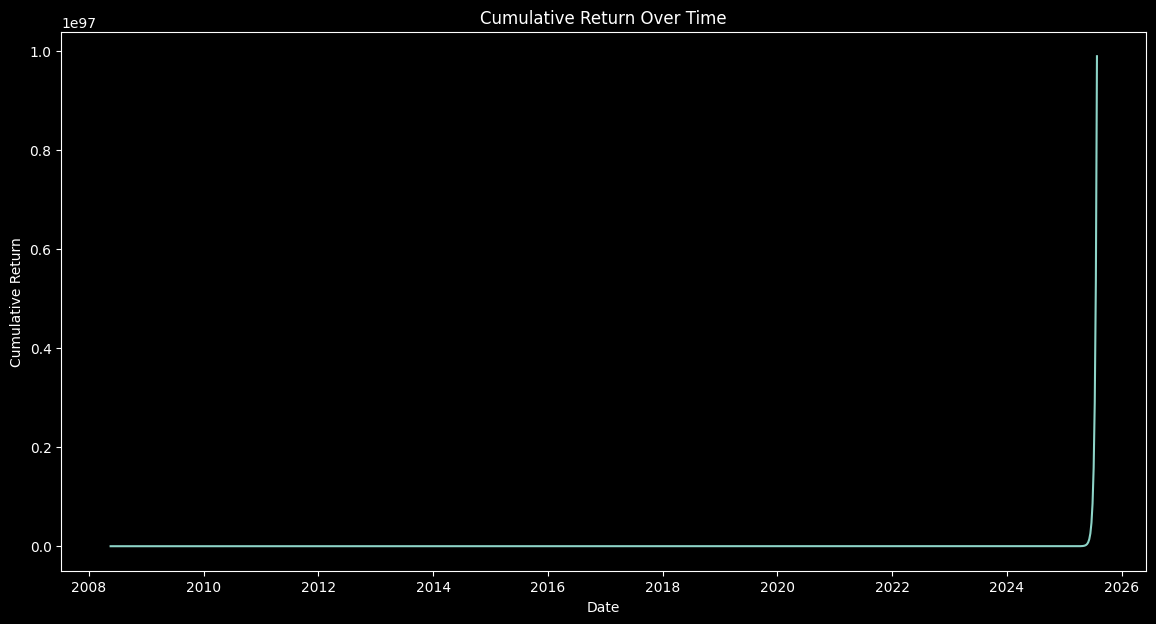


<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
KeyError: 'Date'
<<<<<<< Message >>>>>>
<<<<<<< Code >>>>>>
# Let's check the column names to understand the KeyError
print(df.columns)
Index(['HRP_Return', 'Cumulative_Return'], dtype='object')

<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
Index(['HRP_Return', 'Cumulative_Return'], dtype='object')

<<<<<<< Message >>>>>>
<<<<<<< 최종 답변 >>>>>>
It seems that the 'Date' column is not present in the DataFrame. This might be due to a previous operation that removed or renamed it. To proceed with the analysis, we need the 'Date' information. Could you please provide the DataFrame with the 'Date' column included, or let me know if there's another way to identify the time sequence in the data?
<<<<<<< 최종 답변 >>>>>>


In [8]:
for step in response2:
    stream_parser.process_agent_steps(step)

In [9]:
python_tool.locals["df"] = asset_weights
response3 = agent_asset_weights.stream(
    {"input": "최근 자산별 비중을 추출해주고 자산별 가중치에 대해 인사이트를 도출해줘"}
)

In [10]:
for step in response3:
    stream_parser.process_agent_steps(step)

<<<<<<< Code >>>>>>
df.iloc[-1]
Date    2025-07-27
SPY       0.056374
FEZ       0.048523
EWJ       0.018991
EEM       0.066256
IEF       0.141089
TLT       0.044659
TIP       0.314948
GLD       0.086425
DBC       0.082832
DBA       0.103466
IYR       0.036437
Name: 898, dtype: object
<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
Date    2025-07-27
SPY       0.056374
FEZ       0.048523
EWJ       0.018991
EEM       0.066256
IEF       0.141089
TLT       0.044659
TIP       0.314948
GLD       0.086425
DBC       0.082832
DBA       0.103466
IYR       0.036437
Name: 898, dtype: object
<<<<<<< Message >>>>>>
<<<<<<< 최종 답변 >>>>>>
최근 자산별 비중은 다음과 같습니다:

- SPY: 5.64%
- FEZ: 4.85%
- EWJ: 1.90%
- EEM: 6.63%
- IEF: 14.11%
- TLT: 4.47%
- TIP: 31.49%
- GLD: 8.64%
- DBC: 8.28%
- DBA: 10.35%
- IYR: 3.64%

### 인사이트
1. **TIP (Treasury Inflation-Protected Securities)**: 가장 높은 비중을 차지하고 있으며, 이는 인플레이션에 대한 보호를 중요시하는 투자 전략을 나타낼 수 있습니다.
   
2. **IEF (iShares 7-10 Year Treasury Bond ETF)**: 두 번째로 높은 비중을 차지하고 있어, 중기 국채